# Bagged Tree to Classify Fetal Health

Note: The resources used while building this model are as follows.
1. https://www.tensorflow.org/tutorials/load_data/csv

# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sb

# Data

In [2]:
data = pd.read_csv("./fetal_health.csv")

data.head()
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Pre processing

# Training

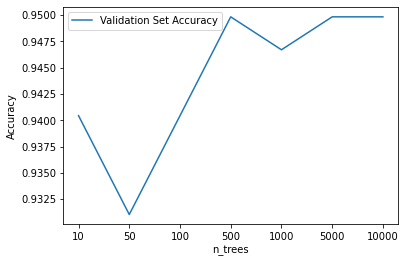

In [19]:
# Split out train data, 80%, and the rest, 20%
X_train, X_rest, Y_train, Y_rest = train_test_split(data.drop('fetal_health', axis=1), data['fetal_health'], test_size=0.20, random_state=33)
# Spit out validate data, 15% (of total, 75% of X_rest), and test, 5% (of total, 25% of rest)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_rest, Y_rest, test_size=0.25, random_state=37)

trees = [10, 50, 100, 500, 1000, 5000, 10000]
models = dict()

for n in trees:
    models[str(n)] = BaggingClassifier(n_estimators=n)
    
scores, names = list(), list()

for name, model in models.items():
    model.fit(X_train, Y_train)
    res = model.score(X_validate, Y_validate)
    scores.append(res)
    names.append(name)

plt.plot(names, scores, label="Validation Set Accuracy")
        
plt.legend()
plt.xlabel('n_trees')
plt.ylabel('Accuracy')
plt.show()


As shown above, the Bagged Tree with 100 trees performed best.

# Testing

              precision    recall  f1-score   support

      normal       0.95      0.99      0.97        83
     suspect       0.94      0.83      0.88        18
pathological       1.00      0.83      0.91         6

    accuracy                           0.95       107
   macro avg       0.96      0.88      0.92       107
weighted avg       0.95      0.95      0.95       107



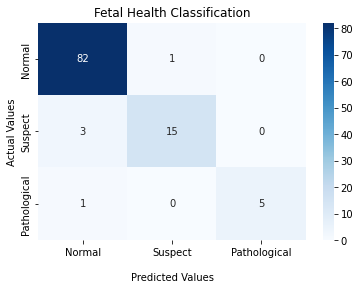

In [20]:
bagged_tree = BaggingClassifier(n_estimators=100)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

print(classification_report(Y_test, Y_pred, target_names=['normal', 'suspect', 'pathological'] ))

confusion = sb.heatmap(confusion_matrix(Y_test, Y_pred), annot=True, cmap='Blues')
confusion.set_title("Fetal Health Classification")
confusion.set_xlabel("\nPredicted Values")
confusion.set_ylabel("Actual Values")
confusion.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
confusion.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

plt.show()